---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

*Note: Some of the cells in this notebook are computationally expensive. To reduce runtime, this notebook is using a subset of the data.*

# Case Study: Sentiment Analysis

### Data Prep

In [35]:
friends_chars={} 
Rachel=[]
Ross=[]
Joey=[]
Chandler=[]
Phoebe=[]
Monica=[]
with open("transcripts_friends/season_all/merged.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        #print("Line {}: {}".format(cnt, line))
        if line.startswith('Rachel:'):
            Rachel.append(line[8:])
        elif line.startswith('Ross:'):
            Ross.append(line[6:])
        elif line.startswith('Monica:'):
            Monica.append(line[8:])
        elif line.startswith('Chandler:'):
            Chandler.append(line[10:])
        if line.startswith('Phoebe:'):
            Phoebe.append(line[8:])
        if line.startswith('Joey:'):
            Joey.append(line[6:])

friends_chars['RACHEL']=Rachel
friends_chars['ROSS']=Ross
friends_chars['MONICA']=Monica
friends_chars['PHOEBE']=Phoebe
friends_chars['CHANDLER']=Chandler
friends_chars['JOEY']=Joey


with open("transcripts_friends/season_all/rachel.txt", "w") as f_r:
    s=''
    for line in Rachel:
        s=s+''+line
        
        
    f_r.write(s)
        
with open("transcripts_friends/season_all/monica.txt", "w") as f_m:
    for line in Monica:
        f_m.write(line)
    
f_r.close()
f_m.close()

In [82]:
pd.set_option('display.max_colwidth', -1)

In [80]:
friends_chars['RACHEL']

['(through wall) Ooh... I love Barbados!\n',
 "I know, I'm her!\n",
 'ooh...\n',
 'Hey, you know, before you said that nothing could happen between us? What changed?\n',
 "What? Ross and Charlie? (Joey nods) Wow! She's really making her way through the group, huh? Ah, who am I to talk?\n",
 "Oh, ju-ju-just stay calm. Just be calm. For all he knows we're just hanging out together. Right? Just be nonchalant. (Joey like stands at attention with his chest forward and his hands on his sides, looking up at the ceiling with his lips pouted.) That's not nonchalant!\n",
 'Oh... okay, just hide!\n',
 'Coming! Try under the bed, try under the bed!\n',
 "There's no room under the bed. (looks around because she can't find Joey anymore)\n",
 'Yeah... (still looking to see where Joey went, and opens the door)\n',
 'Hi...\n',
 "...I really don't... (looks around again)\n",
 'Yeah, sure... (looks outside into the corridor if Joey is there)\n',
 '(clearly not listening and still trying to find out where

In [37]:
import pandas as pd
df6 = pd.DataFrame(friends_chars['MONICA'])
df5 = pd.DataFrame(friends_chars['ROSS'])

df4 = pd.DataFrame(friends_chars['RACHEL'])
df3 = pd.DataFrame(friends_chars['PHOEBE'])

df2 = pd.DataFrame(friends_chars['JOEY'])
df1 = pd.DataFrame(friends_chars['CHANDLER'])

In [38]:
df1.head()

,0
0,"You know, I'd love to, but I'm a little tired.\n"
1,You're on!\n
2,He could be alone. This morning I heard him do...
3,She's cheating on Joey with Ross!\n
4,Wow!\n


In [5]:
df1.shape

(16331, 1)

In [50]:
listOfCharacters1 = ['Chandler'] *df1.shape[0]
listOfCharacters2 = ['Joey'] *df2.shape[0]
listOfCharacters3 = ['Phoebe'] *df3.shape[0]
listOfCharacters4 = ['Rachel'] *df4.shape[0]
listOfCharacters5 = ['Ross'] *df5.shape[0]
listOfCharacters6 = ['Monica'] *df6.shape[0]


In [52]:
df1['Character'] = listOfCharacters1
df2['Character'] = listOfCharacters2 
df3['Character'] = listOfCharacters3
df4['Character'] = listOfCharacters4
df5['Character'] = listOfCharacters5
df6['Character'] = listOfCharacters6


In [56]:
df1=df1.rename(columns={0: 'Dialogue'})
df2=df2.rename(columns={0: 'Dialogue'})
df3=df3.rename(columns={0: 'Dialogue'})
df4=df4.rename(columns={0: 'Dialogue'})
df5=df5.rename(columns={0: 'Dialogue'})
df6=df6.rename(columns={0: 'Dialogue'})

In [83]:
df = pd.concat([df1, df2,df3,df4,df5,df6])
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,dialogue,Character
0,"Well, there was a disaster in shipping and I’ve got to get this order in. Honey, I’m so sorry, but it looks like I’m gonna be here all night.\n",Rachel
1,"Ah, look on the bright side, I mean you won't have to live with this ugly chair! That was here already huh? I love you. (they hug again)\n",Chandler
2,Yeah.\n,Rachel
3,(To Monica) You’re drunk! Mom and dad are gonna be maaaaadd! Maybe I’m a little drunk.\n,Ross
4,So you're moving in with him. What happened?\n,Monica


In [85]:
from io import StringIO
col = ['Character', 'dialogue']
df = df[col]
df = df[pd.notnull(df['dialogue'])]
df.columns = ['Character', 'dialogue']
df['category_id'] = df['Character'].factorize()[0]
category_id_df = df[['Character', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Character']].values)
df.head(20)


,Character,dialogue,category_id
0,Rachel,"Well, there was a disaster in shipping and I’ve got to get this order in. Honey, I’m so sorry, but it looks like I’m gonna be here all night.\n",0
1,Chandler,"Ah, look on the bright side, I mean you won't have to live with this ugly chair! That was here already huh? I love you. (they hug again)\n",1
2,Rachel,Yeah.\n,0
3,Ross,(To Monica) You’re drunk! Mom and dad are gonna be maaaaadd! Maybe I’m a little drunk.\n,2
4,Monica,So you're moving in with him. What happened?\n,3
5,Ross,Turn! Turn!\n,2
6,Rachel,"Absolutely. Shoop, shoop, shoop. Only a hundred and two dollars to go.\n",0
7,Ross,Ben Franklin.\n,2
8,Monica,"Yeah, but I love you more. Besides y’know, nothing goes with Bing. So I’m screwed. I mean… (Rachel hands Emma to Monica.) Oh, hi Emma. Yeah, that’s you. You’re our little Em. Oh what’s that honey? What? Oh, you want a little cousin? (To Chandler) You want a cousin right now?!\n",3
9,Phoebe,"You know what? Maybe once they start dating, and they see what's out there, they'll realise how good they are for each other.\n",4


In [66]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


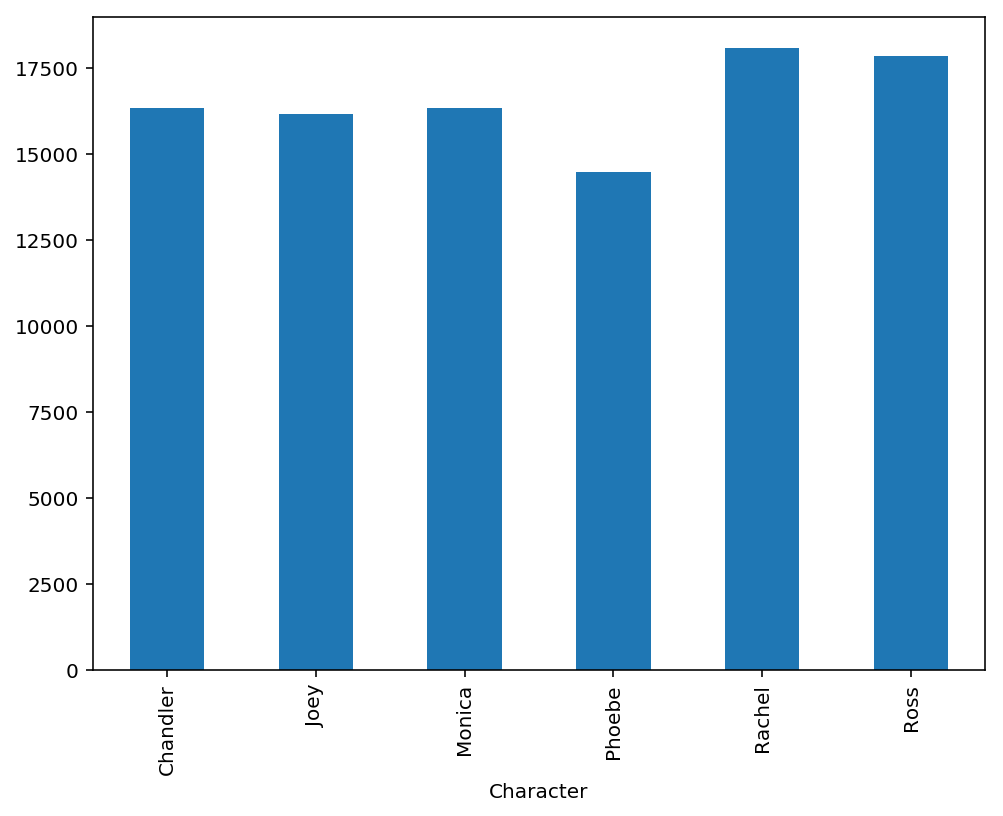

In [68]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Character').dialogue.count().plot.bar(ylim=0)
plt.show()

In [69]:
def print_plot(index):
    example = df[df.index == index][['dialogue']].values[0]
    if len(example) > 0:
        print(example[0])
        print('dialogue:', example[0])
print_plot(10)

Hey, look who's here! It's Joey, and he brought home a friend.

dialogue: Hey, look who's here! It's Joey, and he brought home a friend.



In [86]:
import re
from nltk.corpus import stopwords


df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['dialogue'] = df['dialogue'].apply(clean_text)
df['dialogue'] = df['dialogue'].str.replace('\d+', '')
df.head()

,Character,dialogue,category_id
0,Rachel,well disaster shipping ive got get order honey im sorry looks like im gonna night,0
1,Chandler,ah look bright side mean wont live ugly chair already huh love hug,1
2,Rachel,yeah,0
3,Ross,monica youre drunk mom dad gonna maaaaadd maybe im little drunk,2
4,Monica,youre moving happened,3


In [71]:
print_plot(10)

hey look whos joey brought home friend
dialogue: hey look whos joey brought home friend


In [16]:
!pip3 install keras

You should consider upgrading via the 'pip install --upgrade pip' command.


In [72]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


In [107]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 200
# This is fixed.
EMBEDDING_DIM = 128
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['dialogue'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 15971 unique tokens.


In [191]:
X = tokenizer.texts_to_sequences(df['dialogue'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (99233, 200)


In [192]:
Y = pd.get_dummies(df['category_id']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (99233, 6)


In [208]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(66486, 200) (66486, 6)
(32747, 200) (32747, 6)


In [209]:
X_test


array([[    0,     0,     0, ...,    30,     2,    40],
       [    0,     0,     0, ...,     0,   131,    88],
       [    0,     0,     0, ...,     5,    65, 13443],
       ...,
       [    0,     0,     0, ...,    25,    13,     3],
       [    0,     0,     0, ...,     0,     0,     4],
       [    0,     0,     0, ...,     0,     0,     3]], dtype=int32)

In [210]:
Y_test[9911]

array([0, 0, 0, 0, 0, 1], dtype=uint8)

In [211]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [212]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 128)          6400000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 24)                614424    
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 150       
Total params: 7,014,574
Trainable params: 7,014,574
Non-trainable params: 0
_________________________________________________________________


In [213]:
num_epochs = 10
model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test))

Train on 66486 samples, validate on 32747 samples
Epoch 1/10
66486/66486 [==============================] - 168s 3ms/sample - loss: 1.7897 - accuracy: 0.1793 - val_loss: 1.7895 - val_accuracy: 0.1831
Epoch 2/10
66486/66486 [==============================] - 167s 3ms/sample - loss: 1.7891 - accuracy: 0.1805 - val_loss: 1.7894 - val_accuracy: 0.1777
Epoch 3/10
66486/66486 [==============================] - 167s 3ms/sample - loss: 1.7890 - accuracy: 0.1810 - val_loss: 1.7894 - val_accuracy: 0.1831
Epoch 4/10
66486/66486 [==============================] - 168s 3ms/sample - loss: 1.7890 - accuracy: 0.1792 - val_loss: 1.7895 - val_accuracy: 0.1831
Epoch 5/10
66486/66486 [==============================] - 169s 3ms/sample - loss: 1.7890 - accuracy: 0.1824 - val_loss: 1.7895 - val_accuracy: 0.1777
Epoch 6/10
66486/66486 [==============================] - 169s 3ms/sample - loss: 1.7891 - accuracy: 0.1816 - val_loss: 1.7894 - val_accuracy: 0.1831
Epoch 7/10
66486/66486 [==========================

In [122]:
y = tokenizer.texts_to_sequences("And I will be using his dead body as a shield")
y = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
y_pred=model.predict(y)

In [123]:
y_pred

array([[9.6520245e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0307041e-01, 2.3841858e-07, 2.0861626e-07,
        0.0000000e+00, 1.8477440e-06],
       [5.5945814e-03, 1.3594627e-03, 2.6479065e-03, 1.1436045e-03,
        1.3720393e-03, 2.9845238e-03],
       ...,
       [0.0000000e+00, 2.9802322e-08, 1.7881393e-07, 0.0000000e+00,
        2.9802322e-08, 9.6694469e-01],
       [4.4738352e-03, 2.9802322e-08, 8.9406967e-08, 0.0000000e+00,
        0.0000000e+00, 4.3213367e-06],
       [6.0504658e-07, 2.4828441e-02, 1.0136640e-06, 3.6761267e-05,
        6.9885231e-05, 6.2835352e-06]], dtype=float32)

In [127]:
text = tokenizer.sequences_to_texts(y_pred)
text

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


In [24]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(50000, 128)


In [25]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(X_train[1]))
print(X_train[1])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? dont talking laughs nervously continues leaqve
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0   

In [26]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, len(reverse_word_index)):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [27]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [28]:
sentence = "You’re gonna mess it up let me do it."
sequence = tokenizer.texts_to_sequences(sentence)
print(sequence)

[[], [], [8300], [], [3459], [2524], [], [3951], [], [2971], [2971], [10519], [], [], [2524], [3284], [3284], [], [], [], [], [8300], [7968], [], [6650], [2524], [], [], [], [2524], [], [3990], [], [], [], [], []]


In [214]:
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(500, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 59837 samples, validate on 6649 samples
Epoch 1/10
59837/59837 [==============================] - 1124s 19ms/sample - loss: 1.7017 - accuracy: 0.2812 - val_loss: 1.5921 - val_accuracy: 0.3596
Epoch 2/10
59837/59837 [==============================] - 1235s 21ms/sample - loss: 1.4309 - accuracy: 0.4398 - val_loss: 1.4800 - val_accuracy: 0.4205
Epoch 3/10
59837/59837 [==============================] - 1197s 20ms/sample - loss: 1.2355 - accuracy: 0.5169 - val_loss: 1.4252 - val_accuracy: 0.4563
Epoch 4/10
59837/59837 [==============================] - 1277s 21ms/sample - loss: 1.1120 - accuracy: 0.5638 - val_loss: 1.4031 - val_accuracy: 0.4814
Epoch 5/10
59837/59837 [==============================] - 1268s 21ms/sample - loss: 1.0264 - accuracy: 0.5969 - val_loss: 1.4034 - val_accuracy: 0.4874
Epoch 6/10
59837/59837 [==============================] - 1448s 24ms/sample - loss: 0.9655 - accuracy: 0.6161 - val_loss: 1.4057 - val_accuracy: 0.5046
Epoch 7/10
59837/59837 [===============

In [27]:
#tokenizer = info.features['text'].encoder

NameError: name 'info' is not defined

In [218]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 59837 samples, validate on 6649 samples
Epoch 1/10
59837/59837 [==============================] - 353s 6ms/sample - loss: 1.7068 - accuracy: 0.2707 - val_loss: 1.6006 - val_accuracy: 0.3525
Epoch 2/10
59837/59837 [==============================] - 377s 6ms/sample - loss: 1.4250 - accuracy: 0.4448 - val_loss: 1.4842 - val_accuracy: 0.4252
Epoch 3/10
59837/59837 [==============================] - 392s 7ms/sample - loss: 1.1903 - accuracy: 0.5399 - val_loss: 1.4302 - val_accuracy: 0.4584
Epoch 4/10
59837/59837 [==============================] - 418s 7ms/sample - loss: 1.0523 - accuracy: 0.5890 - val_loss: 1.4179 - val_accuracy: 0.4820
Epoch 5/10
59837/59837 [==============================] - 450s 8ms/sample - loss: 0.9661 - accuracy: 0.6198 - val_loss: 1.4468 - val_accuracy: 0.5025
Epoch 6/10
59837/59837 [==============================] - 476s 8ms/sample - loss: 0.9108 - accuracy: 0.6372 - val_loss: 1.4511 - val_accuracy: 0.5089
Epoch 7/10
59837/59837 [===========================

In [95]:
from sklearn.externals import joblib
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)

# some time later...

# # load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)
# print(result)


/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


TypeError: can't pickle _thread.RLock objects

In [134]:
import pickle
# save the model to disk
filename = 'predict_Speaker_from_Dialogue_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

TypeError: can't pickle _thread.RLock objects

In [29]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

9924/9924 [==============================] - 3s 273us/sample - loss: 0.9166 - accuracy: 0.7107
Test set
  Loss: 0.917
  Accuracy: 0.711


NameError: name 'history' is not defined

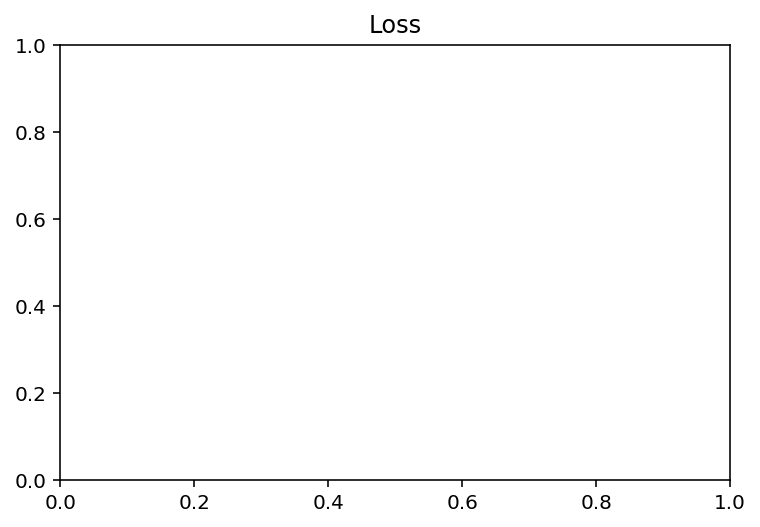

In [30]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [239]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(0,1), stop_words='english')
features = tfidf.fit_transform(df.dialogue).toarray()
labels = df.Character
features.shape

(99233, 6438)

In [240]:
print(tfidf.get_feature_names())

['aa', 'aaaaaahhhh', 'aaah', 'aaahhh', 'aaand', 'aah', 'aand', 'aaron', 'abandoned', 'abbey', 'ability', 'able', 'aboutabout', 'aboutwhat', 'abruptly', 'absolute', 'absolutely', 'absorb', 'accent', 'accept', 'accepted', 'accepting', 'access', 'accident', 'accidentally', 'according', 'account', 'accounts', 'ace', 'ache', 'acoustical', 'acrimonious', 'act', 'acted', 'acting', 'action', 'activity', 'actor', 'actors', 'actress', 'acts', 'actual', 'actually', 'ad', 'adams', 'add', 'added', 'addict', 'address', 'adds', 'adjusting', 'admire', 'admirer', 'admissions', 'admit', 'admits', 'admitting', 'adopt', 'adopted', 'adoption', 'adorable', 'adrienne', 'adult', 'adults', 'advance', 'advantage', 'adventure', 'advertising', 'advice', 'affair', 'affect', 'affects', 'afford', 'afraid', 'afternoon', 'age', 'aged', 'agency', 'agent', 'agents', 'agitated', 'ago', 'agree', 'agreed', 'agreeing', 'agreement', 'agrees', 'ah', 'aha', 'ahahah', 'ahead', 'ahem', 'ahh', 'ahha', 'ahhh', 'ahhhh', 'aint', 'ai

In [39]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Score, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Score))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Chandler':
  . Most correlated unigrams:
. heyhey
. zoo
  . Most correlated bigrams:
. hey whats
. hey yknow
# 'Joey':
  . Most correlated unigrams:
. heyhey
. zoo
  . Most correlated bigrams:
. hey whats
. hey yknow
# 'Monica':
  . Most correlated unigrams:
. heyhey
. zoo
  . Most correlated bigrams:
. hey whats
. hey yknow
# 'Phoebe':
  . Most correlated unigrams:
. heyhey
. zoo
  . Most correlated bigrams:
. hey whats
. hey yknow
# 'Rachel':
  . Most correlated unigrams:
. heyhey
. zoo
  . Most correlated bigrams:
. hey whats
. hey yknow
# 'Ross':
  . Most correlated unigrams:
. heyhey
. zoo
  . Most correlated bigrams:
. hey whats
. hey yknow


In [246]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['dialogue'], df['Character'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)


In [247]:

print(clf.predict(count_vect.transform(["Yeah, well you promised Barry, you d marry him. (Rachel glares at her, and she retreats to safety between Richards legs)"])))

['Ross']


In [248]:
print(clf.predict(count_vect.transform(["And I will be using his dead body as a shield"])))

['Joey']


In [19]:
!pip3 install seaborn


You should consider upgrading via the 'pip install --upgrade pip' command.


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


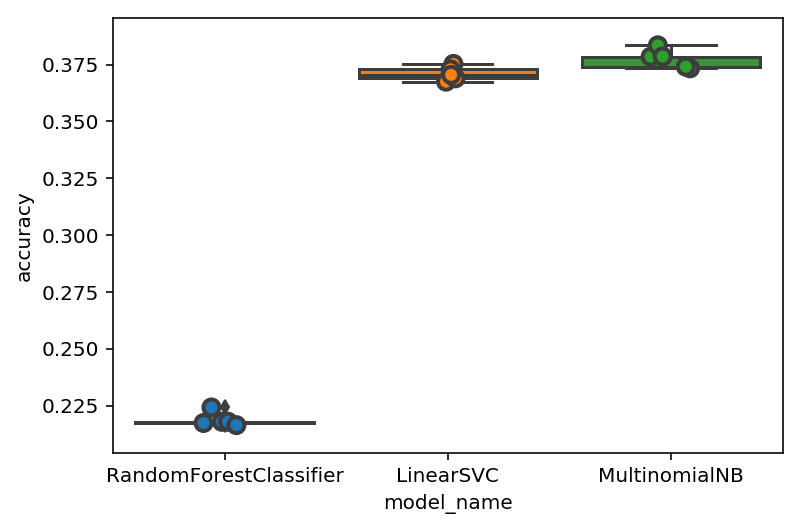

In [250]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(multi_class="crammer_singer"),
    MultinomialNB()
    #LogisticRegression(multi_class="multinomial")
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [32]:
!pip install lightgbm

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [33]:
import lightgbm as lgb


ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
sklearn.naive_bayes.BernoulliNB
sklearn.tree.DecisionTreeClassifier
sklearn.tree.ExtraTreeClassifier
sklearn.ensemble.ExtraTreesClassifier
sklearn.naive_bayes.GaussianNB
sklearn.neighbors.KNeighborsClassifier
sklearn.semi_supervised.LabelPropagation
sklearn.semi_supervised.LabelSpreading
sklearn.discriminant_analysis.LinearDiscriminantAnalysis
sklearn.svm.LinearSVC (setting multi_class=”crammer_singer”)
sklearn.linear_model.LogisticRegression (setting multi_class=”multinomial”)
sklearn.linear_model.LogisticRegressionCV (setting multi_class=”multinomial”)
sklearn.neural_network.MLPClassifier
sklearn.neighbors.NearestCentroid
sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis
sklearn.neighbors.RadiusNeighborsClassifier
sklearn.ensemble.RandomForestClassifier
sklearn.linear_model.RidgeClassifier
sklearn.linear_model.RidgeClassifierCV

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    #RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(multi_class="crammer_singer"),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


E0814 23:20:36.300722 140736012301184 ultratb.py:149] Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-54-22a573826aca>", line 16, in <module>
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  File "/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 389, in cross_val_score
    error_score=error_score)
  File "/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 231, in cross_validate
    for train, test in cv.split(X, y, groups))
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch


KeyboardInterrupt: 

In [57]:
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC                 0.630566
RandomForestClassifier    0.213518
Name: accuracy, dtype: float64

In [195]:
X_test.shape


(9924, 200)

In [229]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
# X_test = X_test.reshape(X_test.shape[1:])
# X_test=X_test.transpose()
y_pred = model.predict(X_test)
y_pred.shape



(32747,)

In [230]:
y_pred

array(['Chandler', 'Chandler', 'Joey', ..., 'Rachel', 'Monica', 'Rachel'],
      dtype=object)

In [231]:
y_test

89338    Chandler
48226    Chandler
96984    Monica  
84811    Phoebe  
4894     Monica  
38010    Ross    
18208    Ross    
95453    Joey    
32387    Phoebe  
24873    Monica  
38291    Rachel  
18335    Phoebe  
80920    Ross    
69358    Chandler
15429    Monica  
96042    Chandler
24010    Chandler
19095    Rachel  
72968    Phoebe  
51120    Ross    
4904     Phoebe  
26906    Chandler
67435    Ross    
62678    Joey    
86685    Phoebe  
986      Monica  
2749     Joey    
70674    Phoebe  
26114    Phoebe  
50392    Chandler
           ...   
56927    Monica  
78161    Phoebe  
85087    Rachel  
15406    Ross    
64726    Ross    
95561    Ross    
63381    Monica  
70344    Rachel  
94131    Rachel  
78420    Chandler
97421    Monica  
80482    Chandler
28498    Rachel  
45327    Monica  
89159    Monica  
79584    Ross    
35906    Monica  
64697    Phoebe  
82621    Ross    
23137    Ross    
29960    Monica  
67796    Ross    
5705     Phoebe  
68551    Rachel  
25666    J

In [232]:
import numpy as np
y_pred=np.argmax(y_pred, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
Y_test=np.argmax(Y_test, axis=1)
Y_test

In [ ]:
y_pred


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Character.values, yticklabels=category_id_df.Character.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [186]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(Y_test == actual) & (y_pred == predicted)]][['Character', 'dialogue']])
      print('')

'Chandler' predicted as 'Rachel' : 94 examples.


IndexError: boolean index did not match indexed array along dimension 0; dimension is 32747 but corresponding boolean dimension is 9924

In [205]:
#model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))


AttributeError: 'Sequential' object has no attribute 'coef_'

In [249]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Character'].unique()))

ValueError: Found input variables with inconsistent numbers of samples: [24809, 32747]